# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

10 Classes are there in y_train

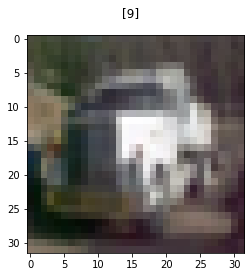

In [7]:
import matplotlib.pyplot as plt

img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
x_train_nor = x_train/255
x_test_nor = x_test/255

In [9]:
x_train_nor[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [0]:
y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
x_train_nor.shape

(50000, 32, 32, 3)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,Dropout, MaxPool2D

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
model = Sequential()

#model.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',input_shape=(32,32,3)))

#Add second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#max Polling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#DropOut Layer
model.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
model.fit(x_train_nor,y_train_enc,          
          validation_data=(x_test_nor,y_test_enc),
          epochs=10,
          batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 297us/sample - loss: 1.2833 - accuracy: 0.5479 - val_loss: 1.2093 - val_accuracy: 0.5886
Epoch 2/10
50000/50000 [==============================] - 8s 164us/sample - loss: 1.0136 - accuracy: 0.6448 - val_loss: 0.9805 - val_accuracy: 0.6610
Epoch 3/10
50000/50000 [==============================] - 8s 160us/sample - loss: 0.8998 - accuracy: 0.6854 - val_loss: 0.9615 - val_accuracy: 0.6647
Epoch 4/10
50000/50000 [==============================] - 8s 160us/sample - loss: 0.8067 - accuracy: 0.7175 - val_loss: 0.9365 - val_accuracy: 0.6706
Epoch 5/10
50000/50000 [==============================] - 8s 161us/sample - loss: 0.7127 - accuracy: 0.7511 - val_loss: 0.9507 - val_accuracy: 0.6791
Epoch 6/10
50000/50000 [==============================] - 8s 159us/sample - loss: 0.6212 - accuracy: 0.7814 - val_loss: 0.8790 - val_accuracy: 0.7091
Epoch 7/10
50000/50000 [=========================

In [19]:
model.evaluate(x_test_nor,y_test_enc)

10000/10000 [==============================] - 1s 90us/sample - loss: 1.0198 - accuracy: 0.6983


[1.0198205094337462, 0.6983]

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions

In [0]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/greatlearning/images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
image1 = load_img('/content/images/49436743043_2441587ab9_c.jpg')
image2 = load_img('/content/images/49438170746_8378201627_c.jpg')
image3 = load_img('/content/images/49441887332_107afa786d_c.jpg')
image4 = load_img('/content/images/4994221690_d070e8a355_c.jpg')

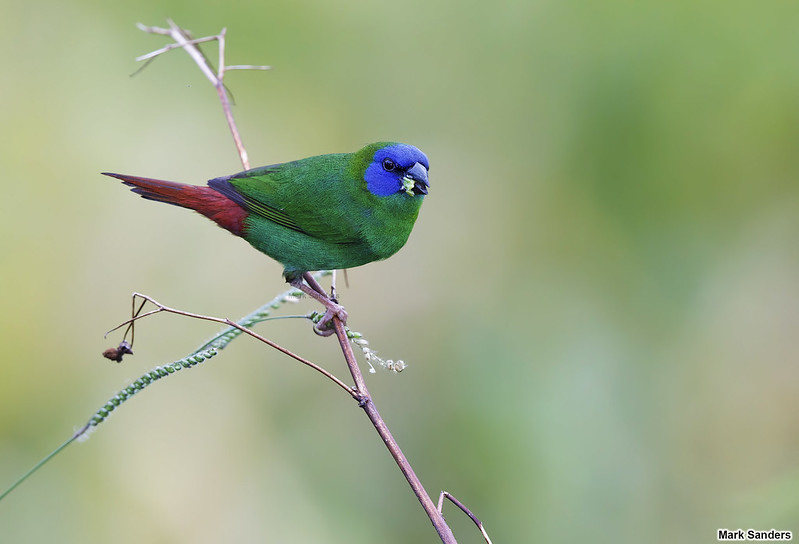

In [41]:
image1

In [56]:
image1.size

(799, 544)

In [43]:
image2.size

(800, 450)

In [44]:
image3.size

(800, 600)

In [45]:
image4.size

(800, 600)

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [57]:
#Prepare Input 
#VGG takes 224x224 image
model_input1 = image1.resize((224,224))
model_input1 = img_to_array(model_input1)
print('Shape of numpy array', model_input1.shape)

Shape of numpy array (224, 224, 3)


In [58]:
#Image array should be normalized in same way as was done for VGG training
model_input1 = preprocess_input(model_input1)

#Add a dimension to input data to make it a 4D input as required by model
model_input1 = np.expand_dims(model_input1, axis=0)
model_input1.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
vgg = VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

In [60]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [64]:
#Predict
prediction = vgg.predict(model_input1)
prediction.shape

(1, 1000)

In [62]:
np.argmax(prediction[0])

94

In [67]:
decode_predictions(prediction)

[[('n01833805', 'hummingbird', 0.36529168),
  ('n01828970', 'bee_eater', 0.30732232),
  ('n01537544', 'indigo_bunting', 0.119894125),
  ('n01820546', 'lorikeet', 0.029818859),
  ('n02268853', 'damselfly', 0.029289473)]]

In [69]:
label=decode_predictions(prediction)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

hummingbird (36.53%)


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
tweets=pd.read_csv('/content/drive/My Drive/greatlearning/tweets.csv',encoding="latin")

In [75]:
tweets.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


**Drop null values**

*   Drop all the rows with null values




In [0]:
tweets=tweets.dropna()

In [79]:
tweets.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [80]:
tweets.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
tweets['tweet_text'] = tweets['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
tweets['tweet_text'] = tweets['tweet_text'].apply(lambda s: s.lower())

In [0]:
tweets['tweet_text'] = tweets['tweet_text'].apply(lambda s: s.strip())

In [89]:
tweets.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion


## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [98]:
tweets.is_there_an_emotion_directed_at_a_brand_or_product.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [0]:
tweets_filter= tweets.loc[tweets['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Negative emotion', 'Positive emotion'])]

In [107]:
tweets_filter.shape

(3191, 3)

In [108]:
tweets_filter['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
tweets_filter['is_there_an_emotion_directed_at_a_brand_or_product']=tweets_filter['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion':1,'Negative emotion':0})

In [110]:
tweets_filter.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,0
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
x=tweets_filter['tweet_text']
y=tweets_filter['is_there_an_emotion_directed_at_a_brand_or_product']

In [112]:
x.head(1)

0    wesley83  have a 3 ihone fter 3 hrs tweeting a...
Name: tweet_text, dtype: object

In [113]:
y.head(1)

0    0
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.25)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [116]:
vect = CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(2393, 5481)
(798, 5481)


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
logreg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [123]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [125]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class_log = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class_nb = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [128]:
print(metrics.accuracy_score(y_test, y_pred_class_log))

0.8609022556390977


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [129]:
print(metrics.accuracy_score(y_test, y_pred_class_nb))

0.8583959899749374
